In [130]:
# First let's import
# Let's do our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas_profiling
import seaborn as sns; sns.set()
import category_encoders as ce
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [131]:
# Let's get our data
Location = "../data/tanzania/"

train_features = pd.read_csv(Location + 'train_features.csv')
train_labels = pd.read_csv(Location + 'train_labels.csv')
test_features = pd.read_csv(Location + 'test_features.csv')
sample_submission = pd.read_csv(Location + 'sample_submission.csv')

# Now let's make sure we have all the data
assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)


In [132]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [133]:
# Now Let's do our test(val)-train split
xtrain = train_features
ytrain = train_labels['status_group']

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.24171717, random_state=42, stratify=ytrain)

In [134]:
# We have used a split that will match the sample submission
# But, just to make sure...
assert xval.shape == (14358, 40)

In [135]:
# Ok, let's use the majority as the baseline
ytrain.mode()[0]

'functional'

In [136]:
# So the majority of the pumps are functional
# Now we turn this value into our prediction set
majclass = ytrain.mode()[0]
ypred = [majclass]*len(ytrain)

ypred[:5]

['functional', 'functional', 'functional', 'functional', 'functional']

In [137]:
# Now we can use accuracy_score to find out our baseline percentage
accuracy_score(ytrain, ypred)

0.5430709115936238

In [138]:
##################################

In [139]:
##################################

In [140]:
# Now let's take a look at our data
list(xtrain)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [141]:
# We can use pandas profiler to give us some much needed info about our dataset
profile = xtrain.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [142]:
# Need to figure out why my pandas profile isn't showing in window
# Pandas Profiler has shown us a few features that will absolutely not work
# We also know that we need to do some work on date_recorded
xtrain['date_recorded'].sample(20)

41485    2013-01-28
57061    2011-03-04
22750    2011-07-13
13764    2013-01-13
55257    2013-02-05
41565    2013-05-03
42535    2011-07-19
17405    2013-03-26
16091    2013-03-12
9181     2011-07-13
37869    2011-03-08
30621    2013-01-20
25941    2013-01-23
36244    2011-07-06
11940    2013-05-03
38774    2013-05-03
29706    2012-10-24
11908    2011-03-11
2233     2013-12-03
44159    2011-03-27
Name: date_recorded, dtype: object

In [143]:
xtrain['date_recorded'] = pd.to_datetime(xtrain['date_recorded'], infer_datetime_format=True)
xtrain['date_recorded'].sample(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


49879   2013-02-20
50655   2013-02-04
30422   2012-10-12
18171   2012-10-13
31418   2011-07-18
19409   2013-01-25
29695   2011-08-06
54441   2011-03-13
57161   2011-03-18
18986   2013-03-08
35992   2013-02-23
39698   2011-03-05
21291   2013-01-30
7727    2013-03-19
4667    2011-02-28
47549   2013-02-18
37304   2013-03-04
24333   2011-02-27
21764   2013-02-10
45254   2011-08-15
Name: date_recorded, dtype: datetime64[ns]

In [144]:
# We'll convert xval also
xval['date_recorded'] = pd.to_datetime(xval['date_recorded'], infer_datetime_format=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
# Now let's take a look at the categorical data
xtrain.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
recorded_by,45042,1,GeoData Consultants Ltd,45042,NaN,NaN
public_meeting,42544,2,True,38693,NaN,NaN
permit,42731,2,True,29436,NaN,NaN
source_class,45042,3,groundwater,34738,NaN,NaN
management_group,45042,5,user-group,39855,NaN,NaN
quantity_group,45042,5,enough,25186,NaN,NaN
quantity,45042,5,enough,25186,NaN,NaN
waterpoint_type_group,45042,6,communal standpipe,26208,NaN,NaN
quality_group,45042,6,good,38463,NaN,NaN
payment_type,45042,7,never pay,19258,NaN,NaN


In [146]:
# And let's take a look at the numerical data
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45042.0,37025.190622,21393.244102,0.00000,18477.000000,37002.000000,55382.750000,7.424700e+04
amount_tsh,45042.0,323.463399,3264.500086,0.00000,0.000000,0.000000,25.000000,3.500000e+05
gps_height,45042.0,668.780627,693.013878,-63.00000,0.000000,370.000000,1320.000000,2.770000e+03
longitude,45042.0,34.081095,6.560645,0.00000,33.091762,34.913647,37.172314,4.034430e+01
latitude,45042.0,-5.714124,2.941220,-11.64944,-8.541792,-5.035072,-3.328812,-2.000000e-08
num_private,45042.0,0.481995,13.611678,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,45042.0,15.254518,17.546686,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,45042.0,5.607255,9.596711,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,45042.0,179.751188,465.088046,0.00000,0.000000,25.000000,214.000000,1.530000e+04
construction_year,45042.0,1301.199214,951.452064,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [156]:
# Let's pick a few features useful looking categorical features to one-hot-encode
catfeatures = ['source_type']

In [157]:
# Let's pick a few features useful looking numerical features to scale
numfeatures = ['district_code', 'gps_height', 'latitude', 'longitude']

In [158]:
# Alright, let's scale, encode and fit
# First, we combine our features
features = catfeatures + numfeatures

# Next we create subsets for our train and validation sets
xtrain_sub = xtrain[features]
xval_sub = xval[features]

# Next we scale on the numeric features
scaler = StandardScaler()
xtrain_sub[numfeatures] = scaler.fit_transform(xtrain_sub[numfeatures])
xval_sub[numfeatures] = scaler.transform(xval_sub[numfeatures])

# Next we onehotencode
encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain_encoded = encoder.fit_transform(xtrain_sub)
xval_encoded = encoder.transform(xval_sub)

# Finally, we are ready to fit our model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(xtrain_encoded, ytrain)

# And we can print out our validation accuracy
print('Validation Accuracy:', model.score(xval_encoded, yval))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Validation Accuracy: 0.5521660398384176


In [164]:
# Only very slightly better that our baseline. Let's try a different feature combination
catfeatures = ['source_type', 'basin']
numfeatures = ['amount_tsh', 'gps_height', 'latitude', 'longitude', 'region_code', 'construction_year']

features = catfeatures + numfeatures

xtrain_sub = xtrain[features]
xval_sub = xval[features]

scaler = StandardScaler()
xtrain_sub[numfeatures] = scaler.fit_transform(xtrain_sub[numfeatures])
xval_sub[numfeatures] = scaler.transform(xval_sub[numfeatures])

encoder = ce.OneHotEncoder(use_cat_names=True)
xtrain_encoded = encoder.fit_transform(xtrain_sub)
xval_encoded = encoder.transform(xval_sub)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(xtrain_encoded, ytrain)

print('Validation Accuracy:', model.score(xval_encoded, yval))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Validation Accuracy: 0.5551608859172587


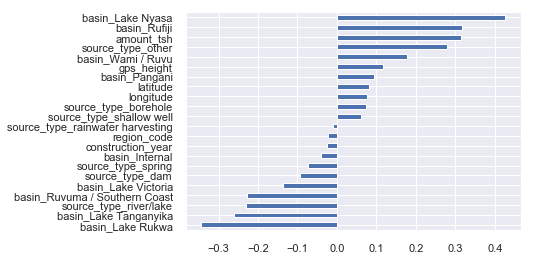

In [165]:
# Slight improvement. So now let's plot our coefficients
coefs = pd.Series(model.coef_[0], xtrain_encoded.columns)
coefs.sort_values().plot.barh()

In [152]:
xval.shape

(14358, 40)

In [168]:
# Now, let's put together our kaggle submission
ypred = model.predict(xval_encoded)

submission = sample_submission.copy()
submission['status_group'] = ypred
submission.to_csv('RaulH_Tanzania.csv', index=False)